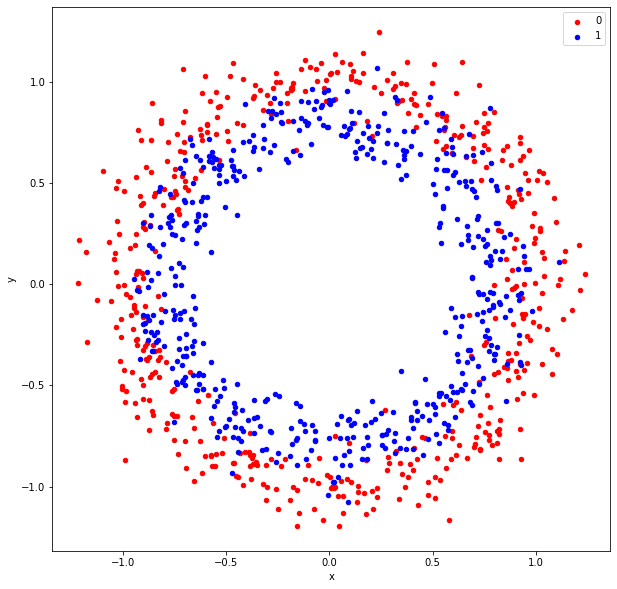

In [2]:
# demo extensively modified from https://machinelearningmastery.com/how-to-accelerate-learning-of-deep-neural-networks-with-batch-normalization/

# mlp overfit on the moons dataset with simple early stopping
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
# from keras.layers.normalization import BatchNormalization  
from tensorflow.keras.layers import BatchNormalization # <---- new

# from keras.optimizers import SGD #
from tensorflow.keras.optimizers import SGD # <---- new

from matplotlib import pyplot


from matplotlib import pyplot
import numpy as np
import pandas as pd
import keras

# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# X, y = make_moons(n_samples=1000, noise=0.2, random_state=1)

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots(figsize=(10,10))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()
 
# plt.figure(figsize=(20,10))

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]



Plot training / test sets

----------training plot---------


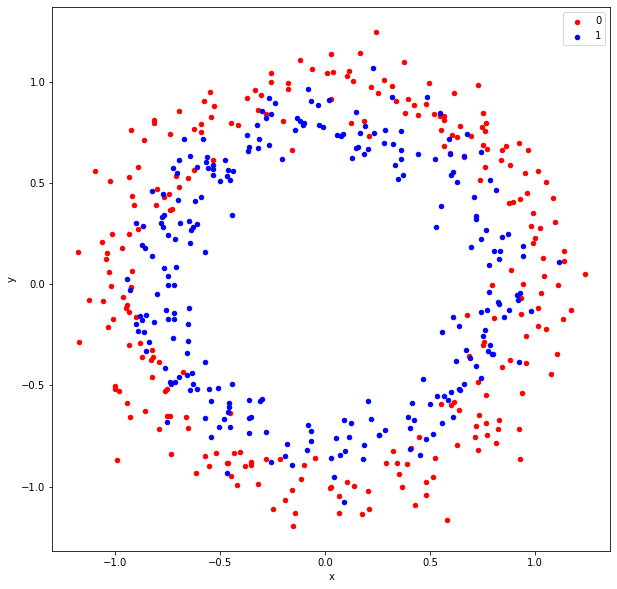

----------test plot---------


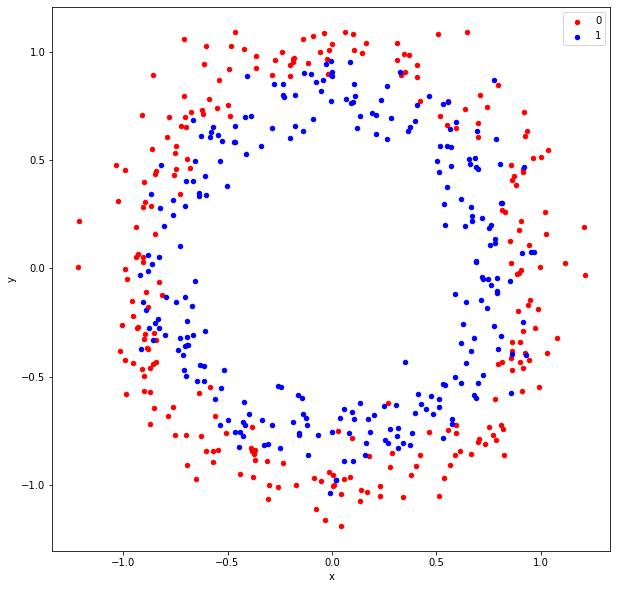

In [3]:
# plot training
print('----------training plot---------')
df2 = pd.DataFrame(dict(x=trainX[:,0], y=trainX[:,1], label=trainy))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots(figsize=(10,10))
grouped = df2.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()


# plot test
print('----------test plot---------')
df2 = pd.DataFrame(dict(x=testX[:,0], y=testX[:,1], label=testy))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots(figsize=(10,10))
grouped = df2.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()


Model without batch normalization

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
16/16 [==============================] - 1s 21ms/step - loss: 0.7202 - accuracy: 0.5100 - val_loss: 0.7011 - val_accuracy: 0.4960
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.5020 - val_loss: 0.6998 - val_accuracy: 0.4860
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6883 - accuracy: 0.5300 - val_loss: 0.6879 - val_accuracy: 0.5060
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6766 - accuracy: 0.5380 - val_loss: 0.6847 - val_accuracy: 0.5000
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6713 - accuracy: 0.5720 - val_loss: 0.6806 - val_accuracy: 0.5660
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6661 - accuracy: 0.5820 - val_loss: 0.6710 - val_accuracy: 0.5600
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6601 - accuracy: 0.5800 - val_loss: 0.6661 - val_accuracy: 0.5660
Epoch 8/100


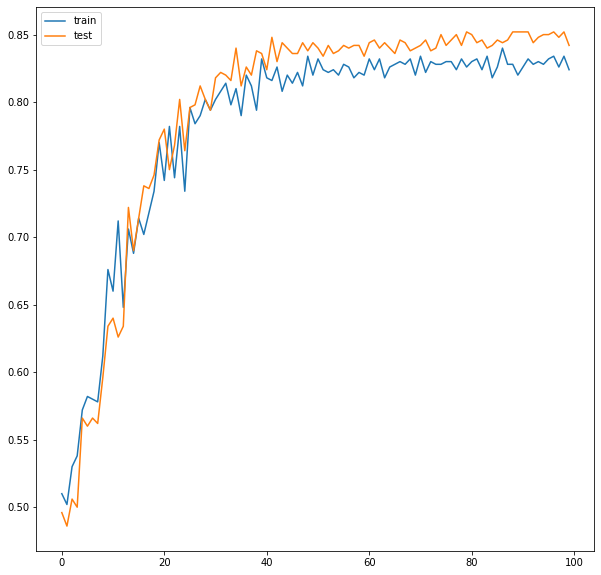

In [4]:
# define model (2 moons, no early stopping)
# model = Sequential()
# model.add(Dense(500, input_dim=2, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# define model without BatchNormalization and weight initialization
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))  # this includes weight initialization
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# simple early stopping
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=1)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
pyplot.figure(figsize=(10,10))
pyplot.plot(history.history['accuracy'], label='train', )
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()


Visualize output

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcec319de10>)

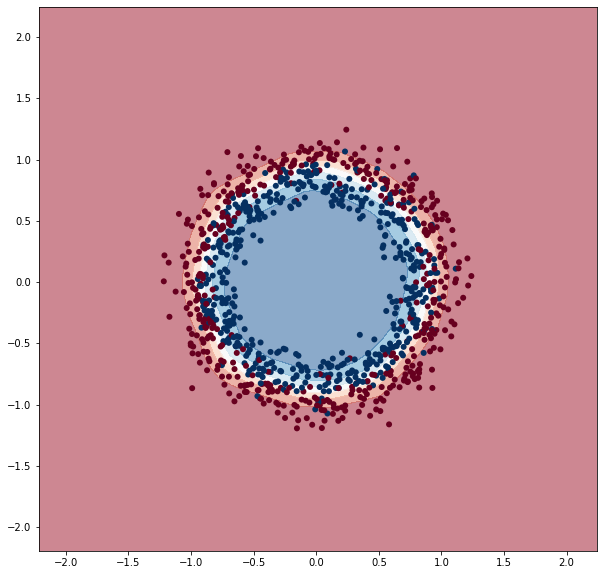

In [5]:
# code from https://rohitmidha23.github.io/Neural-Network-Decision-Boundary/

import matplotlib.pyplot as plt
%matplotlib inline

def plot_decision_boundary(X, y, model, steps=400, cmap='Paired'):
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    # steps = 400
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(10,10))

    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)

    return fig, ax

plot_decision_boundary(X, y, model, cmap='RdBu')

Model with batch normalization

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
16/16 [==============================] - 1s 17ms/step - loss: 0.7574 - accuracy: 0.5360 - val_loss: 0.7287 - val_accuracy: 0.4800
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5981 - accuracy: 0.6940 - val_loss: 0.7541 - val_accuracy: 0.4960
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 0.5546 - accuracy: 0.7520 - val_loss: 0.7797 - val_accuracy: 0.4960
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.5181 - accuracy: 0.7740 - val_loss: 0.8094 - val_accuracy: 0.4960
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4788 - accuracy: 0.7900 - val_loss: 0.7838 - val_accuracy: 0.5000
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4791 - accuracy: 0.7760 - val_loss: 0.7550 - val_accuracy: 0.5060
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 0.4839 - accuracy: 0.7820 - val_loss: 0.7190 - val_accuracy: 0.5220
Epoch 8/100


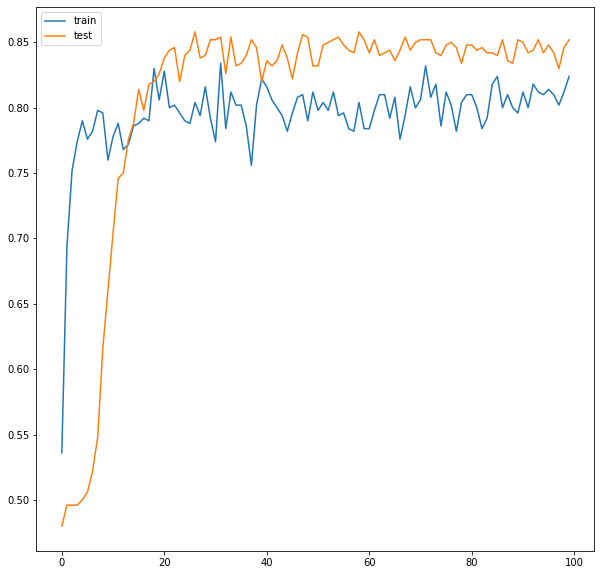

In [6]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization()) # <------ added
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])


# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=1)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot history
pyplot.figure(figsize=(10,10))
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Visualize output

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fcebe9eb210>)

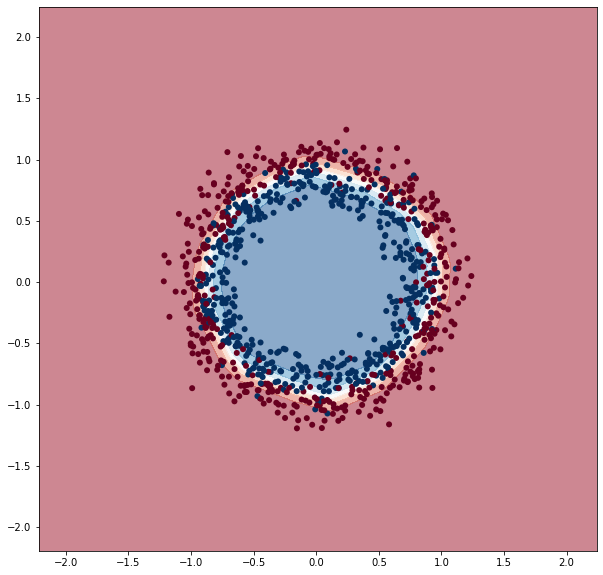

In [7]:
plot_decision_boundary(X, y, model, cmap='RdBu')

Vary Loss function

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


MSE Train: 0.836, Test: 0.838
CE Train: 0.842, Test: 0.848


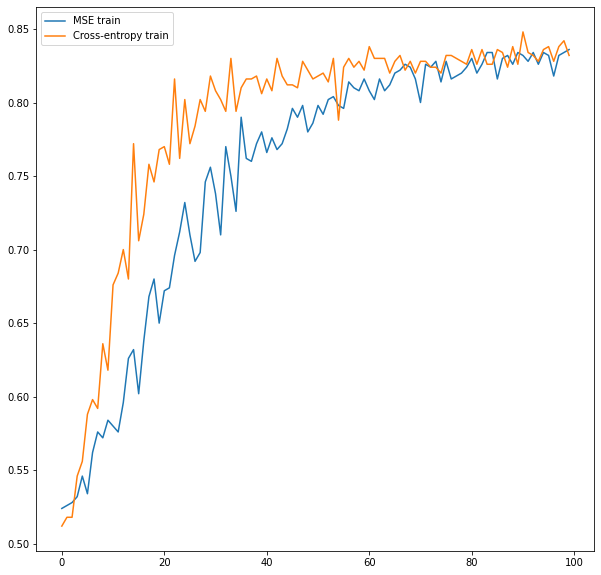

In [8]:
# MSE loss --------------
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))  # this includes weight initialization
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='MSE', optimizer=opt, metrics=['accuracy'])

# fit model
history_mse = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('MSE Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# cross-entropy loss ---------------
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))  # this includes weight initialization
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history_ce = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('CE Train: %.3f, Test: %.3f' % (train_acc, test_acc))


# plot training history
pyplot.figure(figsize=(10,10))
pyplot.plot(history_mse.history['accuracy'], label='MSE train', )
pyplot.plot(history_ce.history['accuracy'], label='Cross-entropy train')
pyplot.legend()
pyplot.show()

Vary learning rate

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


LR=0.01: 0.832, Test: 0.842
LR=0.5: 0.814, Test: 0.836
LR=1.0: 0.602, Test: 0.586


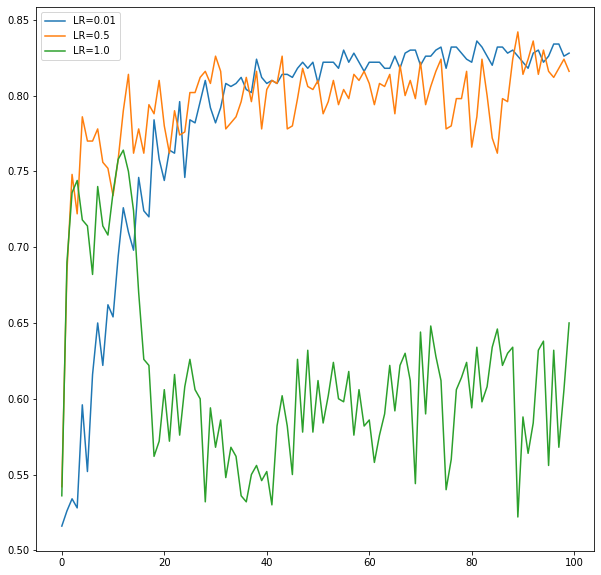

In [9]:
# LR = 0.01 --------------
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))  # this includes weight initialization
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history_001 = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('LR=0.01: %.3f, Test: %.3f' % (train_acc, test_acc))


# LR = 0.5 ---------------
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))  # this includes weight initialization
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.5, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history_050 = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('LR=0.5: %.3f, Test: %.3f' % (train_acc, test_acc))


# LR = 1 ---------------
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))  # this includes weight initialization
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=1, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history_100 = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('LR=1.0: %.3f, Test: %.3f' % (train_acc, test_acc))




# plot training history
pyplot.figure(figsize=(10,10))
pyplot.plot(history_001.history['accuracy'], label='LR=0.01', )
pyplot.plot(history_050.history['accuracy'], label='LR=0.5')
pyplot.plot(history_100.history['accuracy'], label='LR=1.0')

pyplot.legend()
pyplot.show()

Vary momentum

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


M=0: 0.692, Test: 0.652
M=0.5: 0.760, Test: 0.766
M=1.0: 0.708, Test: 0.696


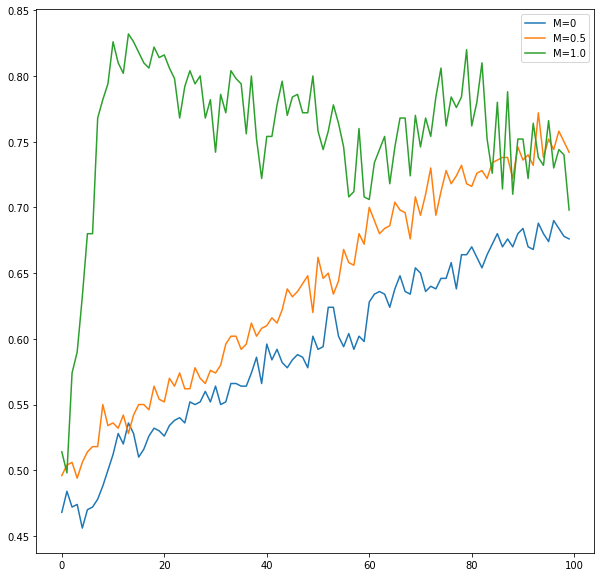

In [10]:
# M = 0 --------------
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))  # this includes weight initialization
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history_000 = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('M=0: %.3f, Test: %.3f' % (train_acc, test_acc))


# M = 0.5 ---------------
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))  # this includes weight initialization
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.5)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history_050 = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('M=0.5: %.3f, Test: %.3f' % (train_acc, test_acc))


# M = 1 ---------------
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))  # this includes weight initialization
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=1)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history_100 = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('M=1.0: %.3f, Test: %.3f' % (train_acc, test_acc))




# plot training history
pyplot.figure(figsize=(10,10))
pyplot.plot(history_000.history['accuracy'], label='M=0', )
pyplot.plot(history_050.history['accuracy'], label='M=0.5')
pyplot.plot(history_100.history['accuracy'], label='M=1.0')

pyplot.legend()
pyplot.show()

Vary Optimizer algorithm

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


MSE Train: 0.836, Test: 0.850
CE Train: 0.824, Test: 0.840


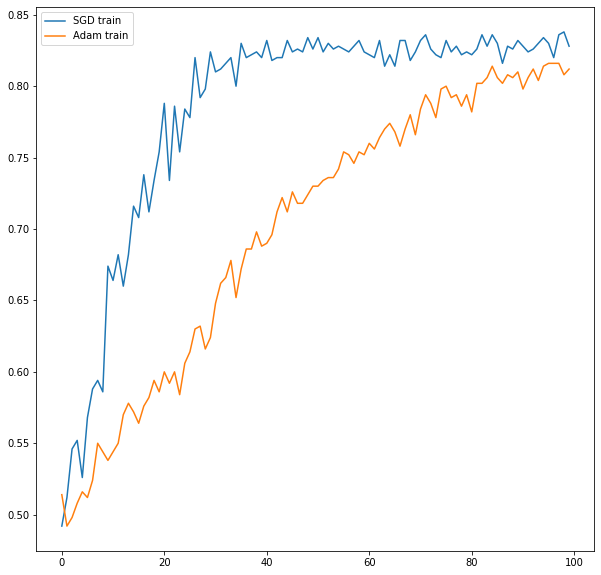

In [11]:
# SGD loss --------------
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))  # this includes weight initialization
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history_SGD = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('MSE Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Adam loss ---------------
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))  # this includes weight initialization
model.add(Dense(1, activation='sigmoid'))
# opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history_Adam = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('CE Train: %.3f, Test: %.3f' % (train_acc, test_acc))


# plot training history
pyplot.figure(figsize=(10,10))
pyplot.plot(history_SGD.history['accuracy'], label='SGD train', )
pyplot.plot(history_Adam.history['accuracy'], label='Adam train')
pyplot.legend()
pyplot.show()